In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load dataset
Here we use a dataset built into Tensorflow - the CIFR Image Dataset. <br>
It contains 60,000 32*32 colored images of 10 different everyday objects (classes), with 6,000 images in each class. <br><br>
The 10 everyday objects/classes are:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

In [9]:
# load & split data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context 
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalise pixel values to be between 0 & 1
train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

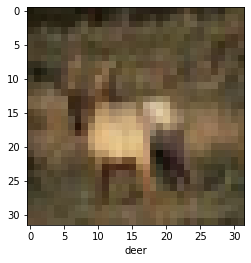

In [16]:
# Let's look at 1 image
IMG_INDEX = 3

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

# Build the model (CNN Architecture)

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# 32 = no. of filters
# (3,3) = dimension of each filter
# input_shape = (height, width, depth)
# depth=3 means 3 color channels ie. RGB
model.add(layers.MaxPooling2D(2,2))
# max pooling operation using 2*2 samples with stride of 2
# causes n*n dimensions to be reduced to (n/2)*(n/2) dimensions
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# the 2nd convolutional layer has 64 filters
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

With each max_pooling layer, our dimensions are reduced by half. <br>
With each convolutional layer, we get 2 pixels less since we didn't use padding.